<a href="https://colab.research.google.com/github/niltonmalves/NLP/blob/master/avaliacao_twitter.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import pandas as pd
import os



In [988]:
ls

bolsonaro.csv  lula10k.csv  mourao.csv    twitterData.csv
bozo.xls       mourao2.csv  sample_data/


In [989]:
data = pd.read_csv('mourao.csv' ,error_bad_lines=False ,encoding="ISO-8859-1",header=0,sep=';')
#data = pd.read_csv('mourao.csv' ,error_bad_lines=False ,encoding="ISO-8859-1",sep=';')
data.head()

,Created-At,From-User,From-User-Id,To-User,To-User-Id,Language,Source,Text,Geo-Location-Latitude,Geo-Location-Longitude,Retweet-Count,Id
0,11/13/19 12:01 AM,UOL Notícias,14594698,NaN,-1,pt,<a href='https://zapier.com/' rel='nofollow'>Zapier.com</a>,"Você deveria ter sido meu vice, e não esse Mourão aí, diz Bolsonaro a príncipe https://t.co/MtalCdihrg",NaN,NaN,390,1194435102958391296
1,11/13/19 1:07 AM,Mônica Bergamo,58951368,NaN,-1,pt,<a href='https://mobile.twitter.com' rel='nofollow'>Twitter Web App</a>,Bolsonaro ao príncipe: você deveria ter sido meu vive e não esse Mourão aí:\nhttps://t.co/WedsuvnbHt,NaN,NaN,480,1194451795592065024
2,11/13/19 12:08 AM,DCM ONLINE,43340387,NaN,-1,pt,<a href='http://twitter.com' rel='nofollow'>Twitter Web Client</a>,"Bolsonaro humilha general e diz a príncipe: Você deveria ter sido meu vice, e não esse Mourão aí https://t.co/QXmBgXMEl5",NaN,NaN,337,1194436801924141056
3,11/13/19 10:40 AM,Sirlei Margarete Flesch,1141153028361338885,NaN,-1,pt,<a href='http://twitter.com/download/android' rel='nofollow'>Twitter for Android</a>,RT @DesSavio: BOLSONARO NÃO TEM RESPEITO E NEM DIGNIDADE É UM SEM NOÇÃO -- OS MILITARES DEVERIA INTERDITAR ESTE MILICIANO VAGABUNDO MOLEQUE,NaN,NaN,24,1194596003212607490
4,11/13/19 10:40 AM,paulo bruschi,196280157,NaN,-1,pt,<a href='http://twitter.com/download/android' rel='nofollow'>Twitter for Android</a>,"RT @leandroruschel: A assessora de imprensa do PT na Folha mente! Quer criar intrigas, para variar.\n\nO presidente não atacou Mourão na conv",NaN,NaN,174,1194595997583839232


In [0]:
#data.columns=['Text']

In [991]:
data['Text'][:20]

0     Você deveria ter sido meu vice, e não esse Mourão aí, diz Bolsonaro a príncipe https://t.co/MtalCdihrg                                        
1     Bolsonaro ao príncipe: você deveria ter sido meu vive e não esse Mourão aí:\nhttps://t.co/WedsuvnbHt                                          
2     Bolsonaro humilha general e diz a príncipe: Você deveria ter sido meu vice, e não esse Mourão aí https://t.co/QXmBgXMEl5                  
3     RT @DesSavio: BOLSONARO NÃO TEM RESPEITO E NEM DIGNIDADE É UM SEM NOÇÃO -- OS MILITARES DEVERIA INTERDITAR ESTE MILICIANO VAGABUNDO MOLEQUE
  
4     RT @leandroruschel: A assessora de imprensa do PT na Folha mente! Quer criar intrigas, para variar.\n\nO presidente não atacou Mourão na conv

5     RT @MarceloBackes12: Você deveria ter sido meu vice, e não esse Mourão aí, diz Jair Bolsonaro, sábio às avessas, ao príncipe Luiz Philipp
  
6     RT @kabokiko: O bozo cuspiu na cara General do Mourão\n\nMônica Bergamo: Você deveria ter sido meu v

In [992]:
data.shape

(9996, 12)

In [993]:
data.columns

Index(['Created-At', 'From-User', 'From-User-Id', 'To-User', 'To-User-Id',
       'Language', 'Source', 'Text', 'Geo-Location-Latitude',
       'Geo-Location-Longitude', 'Retweet-Count', 'Id'],
      dtype='object')

In [994]:
print(data.shape[0])

9996


In [995]:
print(data.isnull().any())

Created-At                False
From-User                 False
From-User-Id              False
To-User                   True 
To-User-Id                False
Language                  False
Source                    False
Text                      False
Geo-Location-Latitude     True 
Geo-Location-Longitude    True 
Retweet-Count             False
Id                        False
dtype: bool


In [0]:
# Defina as opções de exibição para que as letras não sejam cortadas
pd.set_option('display.max_colwidth', -1)

In [997]:
data['Text']

0       Você deveria ter sido meu vice, e não esse Mourão aí, diz Bolsonaro a príncipe https://t.co/MtalCdihrg                                        
1       Bolsonaro ao príncipe: você deveria ter sido meu vive e não esse Mourão aí:\nhttps://t.co/WedsuvnbHt                                          
2       Bolsonaro humilha general e diz a príncipe: Você deveria ter sido meu vice, e não esse Mourão aí https://t.co/QXmBgXMEl5                  
3       RT @DesSavio: BOLSONARO NÃO TEM RESPEITO E NEM DIGNIDADE É UM SEM NOÇÃO -- OS MILITARES DEVERIA INTERDITAR ESTE MILICIANO VAGABUNDO MOLEQUE
  
4       RT @leandroruschel: A assessora de imprensa do PT na Folha mente! Quer criar intrigas, para variar.\n\nO presidente não atacou Mourão na conv

                                                                             ...                                                                      
9991    RT @RenovaMidia: O vice-presidente Hamilton Mourão indagou:\n\nHoje, dia 8 de novembr

In [998]:
data.isnull().any()

Created-At                False
From-User                 False
From-User-Id              False
To-User                   True 
To-User-Id                False
Language                  False
Source                    False
Text                      False
Geo-Location-Latitude     True 
Geo-Location-Longitude    True 
Retweet-Count             False
Id                        False
dtype: bool

In [999]:
null_columns=data.columns[data.isnull().any()]
data[null_columns].isnull().sum()

To-User                   7770
Geo-Location-Latitude     9986
Geo-Location-Longitude    9986
dtype: int64

In [0]:
# Remove characters
import re
data['Text']=data['Text'].str.lower()

In [0]:
newline = lambda x: re.sub('\n', ' ', x) # remove \n
alphanumeric = lambda x: re.sub('\w*\d\w*', ' ', x) 
data['Text']=data.Text.map(alphanumeric)
data['Text']=data.Text.map(newline)

In [1002]:

data['Text']=data['Text'].str.replace('á', 'a', regex=True)
data['Text']=data['Text'].str.replace('é', 'e', regex=True)
data['Text']=data['Text'].str.replace('í', 'i', regex=True)
data['Text']=data['Text'].str.replace('ó', 'o', regex=True)
data['Text']=data['Text'].str.replace('ú', 'u', regex=True)
data['Text']=data['Text'].str.replace('ã', 'a', regex=True)
data['Text']=data['Text'].str.replace('õ', 'o', regex=True)
data['Text']=data['Text'].str.replace('ç', 'c', regex=True)
data['Text']=data['Text'].str.replace('', '', regex=True)
data['Text']=data['Text'].str.replace('ê', 'e', regex=True)
data['Text']=data['Text'].str.replace('-', '', regex=True)
data['Text']=data['Text'].str.replace('', '', regex=True)
data['Text']=data['Text'].str.replace('', '', regex=True)
data['Text']=data['Text'].str.replace('', '', regex=True)
data['Text']=data['Text'].str.replace('', '', regex=True)


data['Text']


0       voce deveria ter sido meu vice, e nao esse mourao ai, diz bolsonaro a principe https://t.co/mtalcdihrg                                      
1       bolsonaro ao principe: voce deveria ter sido meu vive e nao esse mourao ai: https://t.co/wedsuvnbht                                         
2       bolsonaro humilha general e diz a principe: voce deveria ter sido meu vice, e nao esse mourao ai https://t.co/                          
3       rt @dessavio: bolsonaro nao tem respeito e nem dignidade e um sem nocao  os militares deveria interditar este miliciano vagabundo moleque
  
4       rt @leandroruschel: a assessora de imprensa do pt na folha mente! quer criar intrigas, para variar.  o presidente nao atacou mourao na conv

                                                                            ...                                                                     
9991    rt @renovamidia: o vicepresidente hamilton mourao indagou:  hoje, dia   de novembro de  , cabe pe

In [1003]:
ws = lambda x: re.sub(r'\s+', ' ', x)  # # Eliminate duplicate whitespaces
usuario = lambda x: re.sub(r'(?<=@)\w+', '', x)  # #
 
arroba = lambda x: re.sub(r'(@)', '', x)  # #
rt = lambda x: re.sub(r'(rt)', '', x)  # #  
#doispontos = lambda x: re.sub(r'(:)', '', x)  # # 
punctiation = lambda x: re.sub(r'[^A-Za-z0-9]+', ' ', x)  # # 
#re.sub('[^A-Za-z0-9]+', '', mystring) 
#m = re.search('(?<=abc)def', 'abcdef')
#(?<=-)\w+
#"(\d+) (\w+)", r"\2 \1"
#data['Text']=data.Text.map(ws)
http = lambda x: re.sub(r'http\S+', '', x)  # #

data['Text']=data.Text.map(http)
data['Text']=data.Text.map(usuario)

data['Text']=data.Text.map(arroba)
data['Text']=data.Text.map(rt)
#data['Text']=data.Text.map(doispontos)
data['Text']=data.Text.map(punctiation)
data['Text']=data.Text.map(ws)

data['Text'][:20]

0     voce deveria ter sido meu vice e nao esse mourao ai diz bolsonaro a principe                                                
1     bolsonaro ao principe voce deveria ter sido meu vive e nao esse mourao ai                                                   
2     bolsonaro humilha general e diz a principe voce deveria ter sido meu vice e nao esse mourao ai                              
3      bolsonaro nao tem respeito e nem dignidade e um sem nocao os militares deveria interditar este miliciano vagabundo moleque 
4      a assessora de imprensa do pt na folha mente quer criar intrigas para variar o presidente nao atacou mourao na conv        
5      voce deveria ter sido meu vice e nao esse mourao ai diz jair bolsonaro sabio s avessas ao principe luiz philipp            
6      o bozo cuspiu na cara general do mourao m nica bergamo voce deveria ter sido meu vice e nao esse mourao ai diz bolsonaro   
7      o jair queria o magno malta de vice lembro bem depois virou as costas pro al

In [1004]:
data['Text'][:20]

0     voce deveria ter sido meu vice e nao esse mourao ai diz bolsonaro a principe                                                
1     bolsonaro ao principe voce deveria ter sido meu vive e nao esse mourao ai                                                   
2     bolsonaro humilha general e diz a principe voce deveria ter sido meu vice e nao esse mourao ai                              
3      bolsonaro nao tem respeito e nem dignidade e um sem nocao os militares deveria interditar este miliciano vagabundo moleque 
4      a assessora de imprensa do pt na folha mente quer criar intrigas para variar o presidente nao atacou mourao na conv        
5      voce deveria ter sido meu vice e nao esse mourao ai diz jair bolsonaro sabio s avessas ao principe luiz philipp            
6      o bozo cuspiu na cara general do mourao m nica bergamo voce deveria ter sido meu vice e nao esse mourao ai diz bolsonaro   
7      o jair queria o magno malta de vice lembro bem depois virou as costas pro al

In [1005]:
data['Text']

0       voce deveria ter sido meu vice e nao esse mourao ai diz bolsonaro a principe                                                
1       bolsonaro ao principe voce deveria ter sido meu vive e nao esse mourao ai                                                   
2       bolsonaro humilha general e diz a principe voce deveria ter sido meu vice e nao esse mourao ai                              
3        bolsonaro nao tem respeito e nem dignidade e um sem nocao os militares deveria interditar este miliciano vagabundo moleque 
4        a assessora de imprensa do pt na folha mente quer criar intrigas para variar o presidente nao atacou mourao na conv        
                                                                ...                                                                 
9991     o vicepresidente hamilton mourao indagou hoje dia de novembro de cabe perguntar onde esta o estado de direit               
9992     o paido comunista brasileiro pcb sauda a vitoria democratica

In [1006]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

import nltk
nltk.download('punkt')
from nltk.tokenize import word_tokenize


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [1007]:
data['Text_tokens'] = data.Text.map(word_tokenize)

#
data.head(2)

,Created-At,From-User,From-User-Id,To-User,To-User-Id,Language,Source,Text,Geo-Location-Latitude,Geo-Location-Longitude,Retweet-Count,Id,Text_tokens
0,11/13/19 12:01 AM,UOL Notícias,14594698,NaN,-1,pt,<a href='https://zapier.com/' rel='nofollow'>Zapier.com</a>,voce deveria ter sido meu vice e nao esse mourao ai diz bolsonaro a principe,NaN,NaN,390,1194435102958391296,"[voce, deveria, ter, sido, meu, vice, e, nao, esse, mourao, ai, diz, bolsonaro, a, principe]"
1,11/13/19 1:07 AM,Mônica Bergamo,58951368,NaN,-1,pt,<a href='https://mobile.twitter.com' rel='nofollow'>Twitter Web App</a>,bolsonaro ao principe voce deveria ter sido meu vive e nao esse mourao ai,NaN,NaN,480,1194451795592065024,"[bolsonaro, ao, principe, voce, deveria, ter, sido, meu, vive, e, nao, esse, mourao, ai]"


In [1008]:
word_list = sum(data.Text_tokens.tolist(), [])
word_list[:10]

['voce', 'deveria', 'ter', 'sido', 'meu', 'vice', 'e', 'nao', 'esse', 'mourao']

In [1009]:
# Estas são as etapas para encontrar as palavras mais comuns

from collections import Counter

# Converte a lista em um dicionário com contagem de valores
word_counts = Counter(word_list)

# Inverter a chave / valores no dicionário para classificarReverter a chave / valores no dicionário para classificar
word_counts = list(zip(word_counts.values(), word_counts.keys()))

# Classifique a lista por contagem
word_counts = sorted(word_counts, reverse=True)

# Imprime as 10 palavras mais comuns
word_counts[:10]

[(6969, 'o'),
 (6813, 'mourao'),
 (6685, 'e'),
 (4656, 'a'),
 (4489, 'de'),
 (3082, 'que'),
 (2874, 'nossa'),
 (2455, 'do'),
 (2180, 'no'),
 (1915, 'em')]

In [1010]:
from nltk.corpus import stopwords
nltk.download("stopwords")


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [1011]:
stop_words = stopwords.words('portuguese')

stop_lambda = lambda x: [y for y in x if y not in stop_words]
data['tokens_stop2'] = data.Text_tokens.apply(stop_lambda)
data['tokens_stop2'].head()

0    [voce, deveria, ter, sido, vice, nao, mourao, ai, diz, bolsonaro, principe]                                  
1    [bolsonaro, principe, voce, deveria, ter, sido, vive, nao, mourao, ai]                                       
2    [bolsonaro, humilha, general, diz, principe, voce, deveria, ter, sido, vice, nao, mourao, ai]                
3    [bolsonaro, nao, respeito, dignidade, nocao, militares, deveria, interditar, miliciano, vagabundo, moleque]  
4    [assessora, imprensa, pt, folha, mente, quer, criar, intrigas, variar, presidente, nao, atacou, mourao, conv]
Name: tokens_stop2, dtype: object

In [1012]:
word_list = sum(data.tokens_stop2.tolist(), [])
# Converte a lista em um dicionário com contagem de valores
word_counts = Counter(word_list)

# Inverter a chave / valores no dicionário para classificarReverter a chave / valores no dicionário para classificar
word_counts = list(zip(word_counts.values(), word_counts.keys()))

# Classifique a lista por contagem
word_counts = sorted(word_counts, reverse=True)

# Imprime as 10 palavras mais comuns
word_counts[:10]

[(6813, 'mourao'),
 (1440, 'nao'),
 (1384, 'patria'),
 (1378, 'reerguer'),
 (1339, 'missao'),
 (1332, 'restaurar'),
 (1214, 'brasil'),
 (1158, 'general'),
 (909, 'estado'),
 (882, 'direito')]

In [1013]:
word_counts[:20]

[(6813, 'mourao'),
 (1440, 'nao'),
 (1384, 'patria'),
 (1378, 'reerguer'),
 (1339, 'missao'),
 (1332, 'restaurar'),
 (1214, 'brasil'),
 (1158, 'general'),
 (909, 'estado'),
 (882, 'direito'),
 (842, 'onde'),
 (755, 'foto'),
 (754, 'hamilton'),
 (748, 'andre'),
 (738, 'fc'),
 (678, 'bolsonaro'),
 (667, 'pra'),
 (613, 'so'),
 (601, 'vicepresidente'),
 (560, 'declarou')]

In [1014]:
# Vamos encontrar as palavras mais comuns depois de limpar os dados

# Isso cria uma lista enorme combinando todos os valores de tokens
word_list_clean = sum(data.tokens_stop2.tolist(), [])

word_list_clean[:10]

['voce',
 'deveria',
 'ter',
 'sido',
 'vice',
 'nao',
 'mourao',
 'ai',
 'diz',
 'bolsonaro']

In [1015]:
from collections import Counter

# Converte a lista em um dicionário com contagem de valores
word_counts_clean = Counter(word_list_clean)
a = word_counts_clean

# Inverta a chave / valores no dicionário para classificar
word_counts_clean = list(zip(word_counts_clean.values(), word_counts_clean.keys()))

# Classifique a lista por contagem
word_counts_clean = sorted(word_counts_clean, reverse=True)

# Imprime as 10 palavras mais comuns
word_counts_clean[:10]

[(6813, 'mourao'),
 (1440, 'nao'),
 (1384, 'patria'),
 (1378, 'reerguer'),
 (1339, 'missao'),
 (1332, 'restaurar'),
 (1214, 'brasil'),
 (1158, 'general'),
 (909, 'estado'),
 (882, 'direito')]

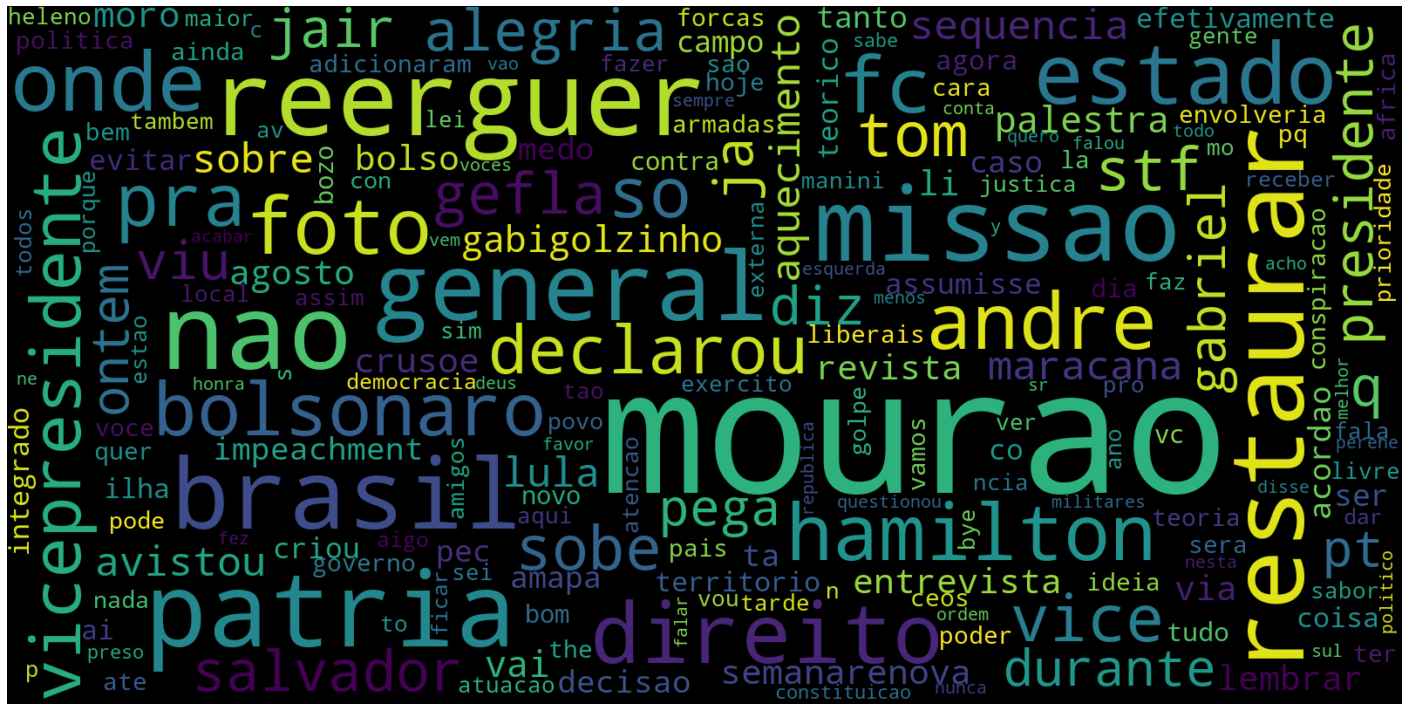

In [1016]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt
text = word_list_clean
wordcloud = WordCloud(width=1600, height=800, max_font_size=200).fit_words(a)
# wordcloud = WordCloud(width=1600, height=800, max_font_size=200).generate(text)
plt.figure(figsize=(25,25))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()